# Entrenando Modelos

## Regresión Lineal

### Ecuación Normal

Para encontrar el valor de $\theta$ que minimiza la función de costo, se puede usar el método de la ecuación normal.

$\hat{\theta} = \left( \textbf{X}^{T} \cdot \textbf{X}\right)^{-1}\cdot \textbf{X}^{T} \cdot \textbf{y} $

en donde $\hat{\theta}$ es el valor de los parámetros $\theta$ que minimizan la función de costo y $\textbf{y}$ es el vector de valores objetivo.

Se genera un set de puntos agregándoles un poco de ruido para posteriormente hacer una regresión lineal usando la ecuación normal.

In [1]:
import numpy as np 

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.06618895],
       [ 2.8644676 ]])

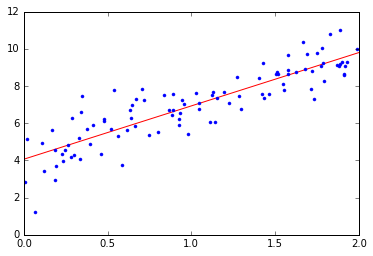

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')

Se debe tener en cuenta que el método de la ecuación normal es depende de invertir una matriz. Invertir una matriz tiene una complejidad computacional $O(n^{3})$. Esto hace que este método sea muy lento para sets de datos que tengan gran número de variables. Sin embargo, la linealidad del método hace que este método maneje sets con gran número de instancias de forma eficiente.

## Gradient Descent

La idea del gradient descent es encontrar el mínimo de la función de costo avanzando hacia la dirección en la que el gradiente (el cambio) sea el mayor posible en la dirección descendente. El proceso se repite hasta lograr convergencia en un valor mínimo.

**Nota:** Para asegurarse que gradient descent funcionará de forma óptima, es conveniente escalar las variables del set de datos. De lo contrario, el algoritmo tomará más tiempo en converger.

### Batch Gradient Descent

El método de Batch Gradient Descent calcula el gradiente de la función de costo usando todo el set de datos. El uso del set de datos completos hace que este algoritmo sea lento para sets de entrenamiento grandes. Como el objetivo es encontrar el grupo de parámetros $\theta$ que optimice la función de costo, la derivada parcial de la función se hace respecto a todos los parámetros $\theta_{j}$. Una vez se encuentra el gradiente respecto a todos los parámetros $\theta$, se resta este gradiente al valor actual de $\theta$. De esta manera se llega poco a poco al valor ideal de los parámetros del modelo.

$\theta^{(\text{nuevo})} = \theta - \eta \nabla_{\theta}\text{MSE}(\theta)$

En la ecuación anterior, $\eta$ es el factor de aprendizaje (learning rate). Este parámetro regula que tan grande es el paso para cada iteración en la búsqueda de los parámetros óptimos. Si el paso es muy pequeño, ie. $\eta$ es pequeño, el modelo tardará mucho en converger. Por el contrario, si $\eta$ es muy grande, el algoritmo se saltará el mínimo de la función.

A continuación está una implementación de Batch Gradient Descent para una regresión lineal inicializando los parámetros $\theta$ de forma aleatoria. (Se debe tener en cuenta que en la implemntación se calculó la derivada de la función de costo de forma analítica.)

In [4]:
eta = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

El valor apropiado para $\eta$ se puede escoger usando un Grid Search. Además se debe escoger un número adecuado de iteraciones para que el modelo no tarde mucho en converger. Por lo general, se define un valor de tolerancia (diferente de cero pero pequeño) para la norma del vector gradiente. Cuando se llegue a ese valor, se detienen la iteraciones del Gradient Descent, ya que se ha llegado tan cerca como se quiere a optimizar la función de costo.

Por lo general, Batch Gradient Descent tiene una tasa de convergencia inversamente del orden de $O\left(\frac{1}{\text{iteraciones}}\right)$. Es decir, si se quiere tener una tolerancia 10 veces menor, se deberán correr 10 veces más iteraciones.

### Stochastic Gradient Descent

Para solucionar el problema de Batch Gradient Descent al usar todo el set de datos, se plantean soluciones como el Stochastic Gradient Descent. El enfoque de este método es escoger una instancia del set de datos de forma aleatoria para calcular el gradiente. Como se están usando un menor número de instancias, este método es considerablemente más rápido que Batch Gradient Descent para sets de datos grandes.

Sin embargo, dada la naturaleza estocástica del algoritmo, no seguirá un camino recto hacia el mínimo de la función. Por el contrario, dará saltos alrededor del espacio de parámetros hasta llegar muy cerca al mínimo de la función. Es por esto que el Stochastic Gradient Descent encuentra valores buenos de $\theta$ pero no óptimos.

Una ventaja adicional que tiene el Stochastic Gradient Descent es que, para funciones de costo irregulares, puede saltar mínimos locales. Esto hace que Stochastic Gradient Descent tenga más opciones de encontrar el mínimo global que el Batch Gradient Descent. 

Una solución para que el algortimo no empiece a saltar de un lado a otro cuando está cerca del mínimo global es ir reduciendo gradualmente la tasa de aprendizaje $\eta$. De esta manera se logra que al principio de la iteraciones se tengan pasos grandes pero, a medida que el camino se acerca al mínimo, los pasos van reduciendo su tamaño. Este método se denomina aprendizaje programado (learning schedule).

A continuación está una implementación de Stochastic Gradient Descent usando aprendizaje programado.

In [5]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

Este algoritmo también se puede implementar usando Scikit-Learn con 50 epochs y usando el aprendizaje programado por defecto.

In [6]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

### Mini-batch Gradient Descent

Mini-batch gradient descent es el punto medio entre los dos métodos anteriores. En vez de escoger el set de datos completo comom en Batch Gradient Descent, o escoger solo una instancia como en Stochastic Gradient Descent, este método escoge un grupo pequeño de instancias llamado mini-batch. 

## Regresión Polinómica

Los modelos lineales se pueden usar para hacer regresiones de modelos no lineales usando regresión polinómica. Este método consiste en agregar como variables potencias de las variables originales.

In [7]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

La forma óptima de agregar potencias de las variables originales es usar la clase de Scikit-Learn `PolynomialFeatures`. El set resultante de la transformación es la variable original y su cuadrado.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.09078042]), array([[ 1.03551459,  0.48296572]]))

## Curvas de Aprendizaje

Las curvas de aprendizaje son curvas del desempeño de del modelo en los sets de entrenamiento y validación en función del tamaño del set de entrenamiento. En primer lugar, están las curvas de aprendizaje para un modelo lineal.

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val[:m]))
        
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Training Set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation Set')
    plt.legend(loc = 'best')
    plt.title('Learning Curve')
    plt.ylabel('RMSE')
    plt.xlabel('Training Set Size')
    plt.ylim((0,3))
    

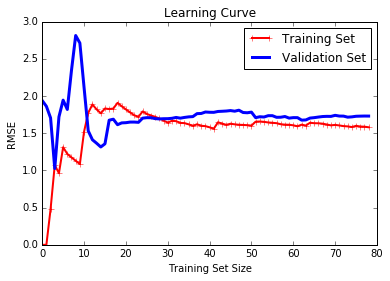

In [13]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

La curva para el set de entrenamiento muestra un incremento del error a medida que aumenta el número de instancias. Esto se debe a que entre más instancias se agreguen, es más difícil para el modelo hacer una regresión perfecta de todos los puntos. El error aumenta hasta llegar hasta un punto en el que la curva es aproximadamente plana. A partir de este momento pareciera que agregar más instancias al set de entrenamiento no ayudaría mucho a mejorar el desempeño del modelo.

Para el caso de la curva para el set de validación, la curva inicia con un RMSE alto y va disminyendo a medida que el set de validación tiene más instancias. Esto se debe a que el modelo no generaliza adecuadamente cuando solo tiene unas pocas instancias disponibles. A pesar de que el error en el set de validación disminuye a medida que el tamaño del set crece, se llega a una curva plana con un error similar al de la curva del set de entrenamiento.

Este par de curvas es típico de un modelo que está sufriendo de **underfitting. Las dos curvas llegan a un plateau, tienen un valor cercano y un error alto.** 

Ahora, se analiza la regresión usando un polinomio de grado 10.

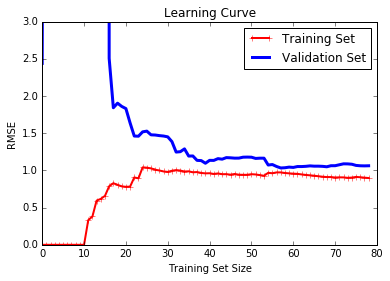

In [14]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias = False)),
    ('lin_reg', LinearRegression())

))

plot_learning_curves(polynomial_regression, X, y)

Para el caso del polinomio de grado 10, el plateau de las curvas ocurre en un error menor al del modelo lineal. Además, hay un espacio en las dos curvas lo que indicaría que el modelo tiene un mejor desempeño en el modelo de entrenamiento que en el de validación. Esta forma de curvas es un ejemplo de **overfitting**. Para este caso, el desempeño en el set de validación mejoraría si se usan más instancias en el entrenamiento. Usar más instancias de entrenamiento hace que mejore un modelo que está sufriendo de overfitting.

### El Bias/Variance Tradeoff

El error en la generalización de un modelo se puede expresar como la suma de tres errores muy diferentes:

*Bias*

Esta parte del error en la generalización se debe a asunciones incorrectas. Por ejemplo, cuando alguien asume que un set de datos tiene una relación lineal cuando en realidad es cuadrática. Un modelo con bias alto es más propenso a sufrir de **underfitting**.

*Variance*

Esta parte se debe a sensibilidad excesiva en el modelo a variaciones pequeñas en los datos de entrenamiento. Un modelo con muchos grados de libertad es propenso a tener una varianza alta, por lo que también es propenso a sufrir de **overfitting.** 

*Error Irreducible*

Esta parte del error se debe a ruido de los datos. La única forma de reducir este tipo de error es limpiar los datos.

**Aumentar la complejidad de un modelo aumentará su varianza y reducirá su bias. En el caso contrario, reducir la complejidad de un modelo incrementa su bias y disminuye su varianza. Es por esto que se denomina un tradeoff**

## Modelos Lineales Regularizados

Una forma de combatir el overfitting en un modelo es reducir sus grados de libertad. Para regularizar un modelo existen métodos como Ridge Regression, Lasso Regression y Elastic Net.

### Ridge Regression

La idea del Ridge Regression es agregar un término de regularización de la forma $\alpha \Sigma_{i = 1}^{n}\theta_{i}^{2}$. Este término fuerza al algoritmo a mantener los pesos de los atributos lo más pequeños posible. El hiperparámetro $\alpha$ controla cuanto se quiere regularizar el modelo. **Una vez se entrena el modelo, se debe evaluar con la función de costo sin el término de regularización.** 

-------

Es común el uso de funciones de costo diferentes en la etapa de entrenamiento y en la de prueba. Una razón para esto, diferente a la regularización, es que en el entrenamiento se deben escoger funciones cuya derivada sea lo más fácil posible de optimizar. En la fase de prueba se debe escoger una función de costo que sea lo más parecida posible al objetivo final del modelo. 

------

$J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \Sigma_{i=1}^{n} \theta_{i}^{2}$

Se debe notar en la ecuación anterior que el término de bias no se regulariza.


Si se define el vector $\textbf{w} = (\theta_{1}, ... , \theta_{n}$, entonces el término de regularización corresponde a $\frac{1}{2}(\left \lVert \textbf{w} \right \rVert_{2})^{2}$. $\lVert \cdot \rVert_{2}$ corresponde a la norma $\mathcal{l}_{2}$ del vector de pesos. 

** Es importante hacerle scaling a los datos antes de ejecutar un Ridge Regression, ya que este tipo de regularización es sensible a los atributos de entrada.**

In [15]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.36954253]])

In [16]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.53840285])

El parámetro `penalty` indica que el término de regularización a usar es la mitad del cuadrado de la norma $l_{2}$ del vector de pesos, equivalente a Ridge Regression.